In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mememuat dataset
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\mouse_viral_study.csv')

In [3]:
# menampilkan 5 baris pertama
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


## EDA - exploratory data analysis dan data visual

In [4]:
plt.style.use(['science','notebook','grid'])

In [5]:
# jumlah baris dan kolom 
df.shape

(400, 3)

In [6]:
# ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [7]:
# ringkasan statistik
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


In [8]:
# mengecek keberadaan nilai null 
df.isna().sum()

Med_1_mL         0
Med_2_mL         0
Virus Present    0
dtype: int64

In [9]:
# nama kolom pada tabel
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

In [10]:
# data ganda
df.duplicated(subset=None).sum()

0

In [11]:
df['Virus Present'].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

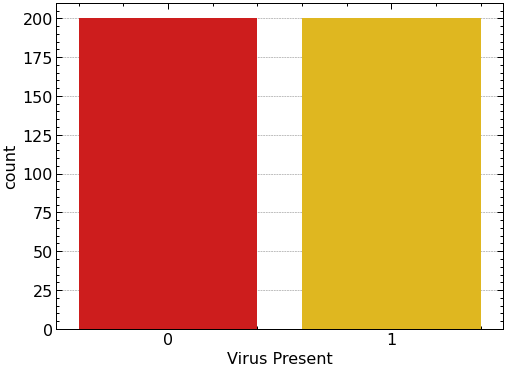

In [12]:
sns.countplot(x='Virus Present',data=df, palette='hot');

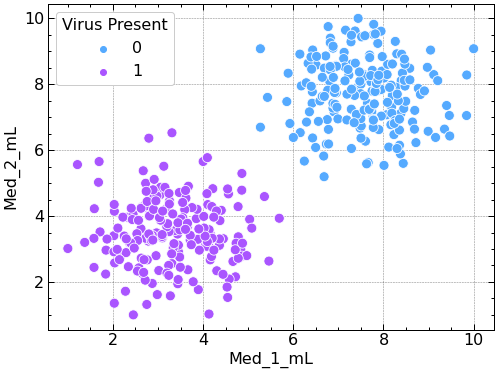

In [13]:
# sebaran data 
sns.scatterplot(x='Med_1_mL',y= 'Med_2_mL', hue='Virus Present', data=df, palette='cool', s=100);

In [14]:
X = df.drop('Virus Present', axis =1)
y = df['Virus Present']

## Model SVM Classifier

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC(kernel='linear')

In [17]:
model.fit(X,y)

SVC(kernel='linear')

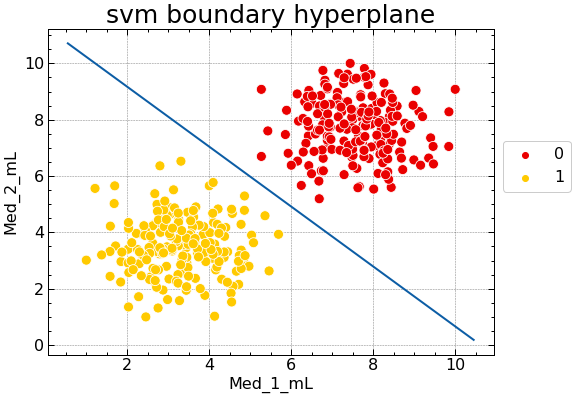

In [18]:
sns.scatterplot(x='Med_1_mL', y='Med_2_mL', data=df)
X = df.drop('Virus Present', axis =1).values
y = df['Virus Present'].values

ax = plt.gca()
xlim = ax.get_xlim()

ax = sns.scatterplot(x='Med_1_mL', y='Med_2_mL', hue='Virus Present', data=df, s=100, palette='hot')

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx -(model.intercept_[0]/ w[1])
plt.plot(xx, yy)
plt.title('svm boundary hyperplane', fontsize=25)
plt.legend(loc=(1.02 , 0.5))
plt.show()



## Split data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

## Preprocessing Scaler data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X_train)

StandardScaler()

In [24]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Hyperparameter Tuning GridSearchCV 

In [25]:
#help(SVC)

In [26]:
model = SVC()

In [27]:
param_grid = {'C': [0.001, 0.01, 0.1 ,1.0, 10, 100],
             'kernel' :['linear', 'rbf', 'poly'],
              'degree' : [2,3,4],
              'gamma' :['scale', 'auto']             
             }

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid = GridSearchCV(model, param_grid)

In [30]:
grid.fit(X_train_scaler, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [31]:
grid.best_estimator_

SVC(C=0.01, degree=2, kernel='linear')

In [32]:
grid.best_estimator_.get_params()

{'C': 0.01,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [33]:
grid.best_score_

1.0

## Plot SVM boundary margins

In [46]:
model = model = SVC(C=0.01, degree=2, kernel='linear')
model.fit(X, y)

SVC(C=0.01, degree=2, kernel='linear')

In [49]:
def plot_boundary_margin(model, X, y):
    X = df.drop('Virus Present', axis=1).values
    y = df['Virus Present'].values
    
    # plot scatter
    plt.scatter(X[:,0], X[:,1], c= y, cmap='bwr', s=30)
    
    # plot decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # membuat grid untuk evaluasi model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX,YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # plot boundary dan margins
    ax.contour(XX,YY,Z, colors='k', alpha=0.5, linestyles=['--','-','--'], levels=[-1, 0, 1])
    
    # plot svm
    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
              facecolor='None', lw=0.5, edgecolors='green', s=120)
    plt.show()
    

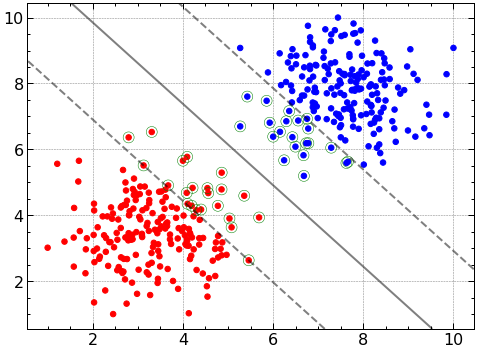

In [50]:
plot_boundary_margin(model, X, y)

---

## Final Model SVM Classifier
berdasarkan best model dari GridSearchCV

In [37]:
model = SVC(C=0.01, degree=2, kernel='linear')

In [38]:
model.fit(X_train_scaler, y_train)

SVC(C=0.01, degree=2, kernel='linear')

In [39]:
preds = model.predict(X_test_scaler)

## Evaluasi model

In [40]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score

In [41]:
confusion_matrix(y_test, preds)

array([[43,  0],
       [ 0, 37]], dtype=int64)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


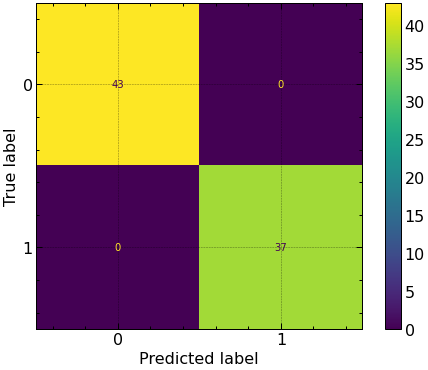

In [42]:
plot_confusion_matrix(model, X_test_scaler, y_test)

In [43]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [51]:
accuracy_score(y_test,preds)

1.0